# Modelo de K-Nearest Neightbors para la predicción de la duración de los quirófanos.
 ## Análisis del rendimiento del modelo KNN.
 
 ### Trabajo de Fin de Grado - Universidad de Burgos
 #### Jesús García Armario

In [1]:
# Imports necesarios
import pandas as pd
from knnReg import KNNReg
import numpy as np
import sys
sys.path.append('..\\')
import Utils.common as common

In [2]:
# Cargamos los datos
data = common.FileToDataframe('../../Datos/Listados_Preprocesados/ListadoInterv_Preprocesado_Codificado.xlsx')
data = common.eliminarOutliers(data)

In [3]:
X, Y = common.divideData(data)

In [4]:
# Iniciamos el modelo
model = KNNReg(X, Y, 0.2, 42)

In [5]:
# Mostrar resultados
print('MSE: ', model.getMSE())
print('Cross Val MSE: ', model.getCrossValMSE())
print('Cross Val Pred MSE: ', model.getCrossValPredMSE())
print('Cross Val RMSE: ', model.getCrossValRMSE())

MSE:  2854.44682313639
Cross Val MSE:  3084.318761999574
Cross Val Pred MSE:  [ 51.28571429  83.85714286  62.92857143 ... 132.85714286  99.64285714
 109.28571429]
Cross Val RMSE:  55.536643416752995


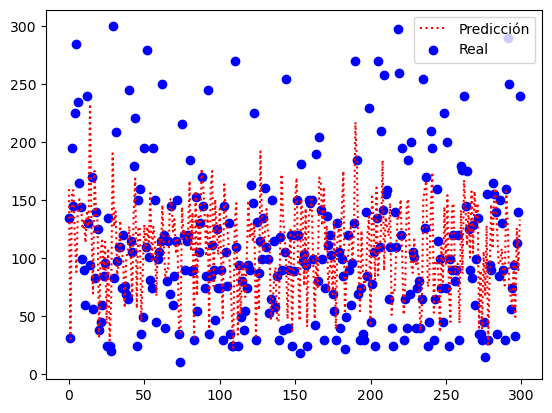

In [7]:
# Representamos los resultados
# Seleccionamos una muestra de los datos
sample_data = data.sample(300, random_state=42)
sample_X, sample_Y = common.divideData(sample_data)
predicciones = model.model.predict(sample_X)
real = sample_Y
common.representarDatos(predicciones,real)

In [8]:
# Exportamos el modelo
model.exportModel('KNNModel.pkl')

In [9]:
# Importamos el modelo ampliado
data = common.FileToDataframe('../../Datos/Listados_Preprocesados/ListadoInterv_Preprocesado_PLASTICA_Codificado.xlsx')
data = common.eliminarOutliers(data)

In [10]:
X, Y = common.divideDataAmpli(data)

c:\Users\Jesus\OneDrive\Ingeniería\Cuarto\TFG\GestorQuirofanos\Modelos\Nearest Neightbors\..\Utils\common.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Código diagnóstico'] = data['Código diagnóstico'].astype(float)


In [11]:
model = KNNReg(X, Y, 0.2, 42)

In [12]:
# Mostar resultados
print('MSE: ', model.getMSE())
print('Cross Val MSE: ', model.getCrossValMSE())
print('Cross Val Pred MSE: ', model.getCrossValPredMSE())
print('Cross Val RMSE: ', model.getCrossValRMSE())

MSE:  2699.435810591236
Cross Val MSE:  2571.510343413069
Cross Val Pred MSE:  [ 55.96391852  63.18405501  63.03074639 ...  58.91098367  45.79240432
 177.7105868 ]
Cross Val RMSE:  50.71006155994162


c:\Users\Jesus\OneDrive\Ingeniería\Cuarto\TFG\GestorQuirofanos\Modelos\Nearest Neightbors\..\Utils\common.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Código diagnóstico'] = data['Código diagnóstico'].astype(float)


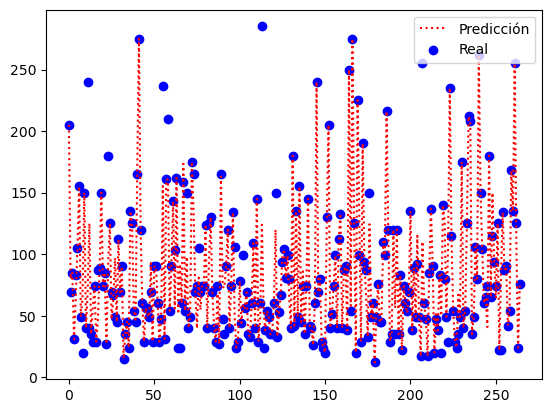

In [13]:
sample_data = data.sample(300, random_state=42)
sample_X, sample_Y = common.divideDataAmpli(sample_data)
predicciones = model.model.predict(sample_X)
real = sample_Y
common.representarDatos(predicciones,real)

In [16]:
# Exportamos el modelo
model.exportModel('KNNModel_PLASTICA.pkl')
print(model.best_params)

{'algorithm': 'kd_tree', 'metric': 'manhattan', 'n_neighbors': 14, 'weights': 'distance'}
